# Author's Note
This tutorials is designed for any learner who is interested in using pytorch in research.  I would like to reccommend to mount drive before start following the tutorials.  

**Author: Ratchainant Thammasudjarit, Ph.D.**

# Deep Learning Experiment  

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1Uav4PApG1tLzmcUtWls9EB4XdyAkKkk0'>
<figcaption>Fig. 1: Overall Experiment</figcaption></center>
</figure>

The tutorials were devided into 4 parts as shown in the Fig. 1 Overall Experiment.  Each block will be discussied in details with coding.

## Data Preparation  
This section covers data preparation that consists of 4 parts:  
1) **File organization**: This part introduces how to organizes the image files and prepare data registry for the downstream tasks  
2) **Data Splitting**:  This part follows standard data splitting methodology in machine learning.    
3) **Create Dataset Object**: This part introduces how to use pytorch dataset class to create the custom dataset.   
4) **Create Data Loader**: This part introduces how to use pytorch dataloader to create the data pipeline.

### File Organization  
<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1Vbwd17M4OXPhtgd7rM0wfoucjODpmXgy'>
<figcaption>Fig. 2: File Organization</figcaption></center>
</figure>  

The file organization is shown in Fig. 2 using an example from `CIFAR10 dataset`.  The `root` represents the project folder that can be any name.  We use `root` for simplicity purpose.  The `images` contains $n$ subfolders for $n$ classes where each subfolder name is a particular class label.  The rest of folders (`log`, `models`, `plots`, `results`, and `src`) are optionally required but having them will make this tutorial run smoothly and make your experiment be more systemmatic.  

The `log` folder stores training log where `training loss` and `validation loss` were monitored.  The `models` folder stores any trained model because one experiment may consists of several model versions.  The `plots` folder stores any figure that was plotted from programming.  The `results` folder stores `prediction and evaluation results` in csv files or other file formats.  The `src` folder stores source codes of those `.py` file.  It is a good practice to seperate the source code to be several modules, however, **this tutorial may not need this folder because we will make several sections in one Colab file**.  

### Data Splitting  

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1VlejkD--Vtul9cOnUrKoE_iKxcZk0B7i'>
<figcaption>Fig. 3: Data Splitting</figcaption></center>
</figure>  

The data splitting is shown in Fig.3 using an example from `CIFAR10 dataset`.  Make sure that **random seet was set before splitting for reproducible purpose.**  We also need to ensure that train, val, and test have approximately the same class distribution.  In this tutorials, data splitting has been done already and you can use `train.csv`, `val.csv`, and `test.csv` directly.

We will define the path of root folder to read `train`, `val`, and `test` in dataframes and explore the class distribution.  Depending on your location, your root path may be different from my root path.  Define a seed number for pseudo random generator for reproducible propose.

In [ ]:
root = "/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image"
seed = 12345

To list all images and labels in a csv file `dataset.csv`, we will define a custom function as follows

In [ ]:
from glob import glob
import json
import pandas as pd

def create_data_registry(root, export=False):
  files = glob(f"{root}/images-small/*/*.*")
  labels = [file.split("/")[-2] for file in files]
  unique_labels = sorted(list(set(labels)))
  index2label = dict(zip(range(len(unique_labels)), unique_labels))
  label2index = dict(zip(unique_labels, range(len(unique_labels))))
  label_encoded = [label2index[label] for label in labels]
  df = pd.DataFrame({"filepath": files, "label": label_encoded})
  if export:
    df.to_csv(f"{root}/dataset_small.csv", index=False)
    with open(f"{root}/label2index_small.json", "w") as f:
      json.dump(label2index, f)
    with open(f"{root}/index2label_small.json", "w") as f:
      json.dump(index2label, f)
  else:
    pass

Executing the `create_data_registry` will create a file `dataset.csv` and save at the `root` folder. Enable `export=True` if you want to create a new registry (`dataset.csv`, `label2index`, and `index2label`)

In [ ]:
create_data_registry(root, export=False)

Read the data registry (`dataset.csv`) back to pandas and perform data splitting

In [ ]:
df = pd.read_csv(f"{root}/dataset_small.csv")
df.head()

,filepath,label
0,/content/drive/MyDrive/Talk Events/AIT/2023/py...,0
1,/content/drive/MyDrive/Talk Events/AIT/2023/py...,0
2,/content/drive/MyDrive/Talk Events/AIT/2023/py...,0
3,/content/drive/MyDrive/Talk Events/AIT/2023/py...,0
4,/content/drive/MyDrive/Talk Events/AIT/2023/py...,0


Read metadata `label2index` and `index2label`

In [ ]:
with open(f"{root}/label2index_small.json") as f:
  label2index = json.load(f)
label2index = {k: int(v) for k, v in label2index.items()}
label2index

{'bird': 0, 'dog': 1, 'frog': 2}

In [ ]:
with open(f"{root}/index2label_small.json") as f:
  index2label = json.load(f)
index2label = {int(k): v for k, v in index2label.items()}
index2label

{0: 'bird', 1: 'dog', 2: 'frog'}

Perform data splitting at 60: 20: 20 for train: val: test

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def split_data(df, root, export=False):
  n = int(0.2 * len(df.index))
  remain, test = train_test_split(df, test_size=n, stratify=df["label"], random_state=seed)
  train, val = train_test_split(remain, test_size=n, stratify=remain["label"], random_state=seed)

  if export:
    train.to_csv(f"{root}/train_small.csv", index=False)
    val.to_csv(f"{root}/val_small.csv", index=False)
    test.to_csv(f"{root}/test_small.csv", index=False)
  else:
    pass

Execute the above function to perform data splitting.

In [ ]:
split_data(df, root, export=False) # We have done this for you already.  Don't need to run it again.

Read train, val, and test back to dataframes.

In [ ]:
train = pd.read_csv(f"{root}/train_small.csv")
val = pd.read_csv(f"{root}/val_small.csv")
test = pd.read_csv(f"{root}/test_small.csv")

Visualize class distribution where x-axis shows labels and y-axis shows percentage of data.

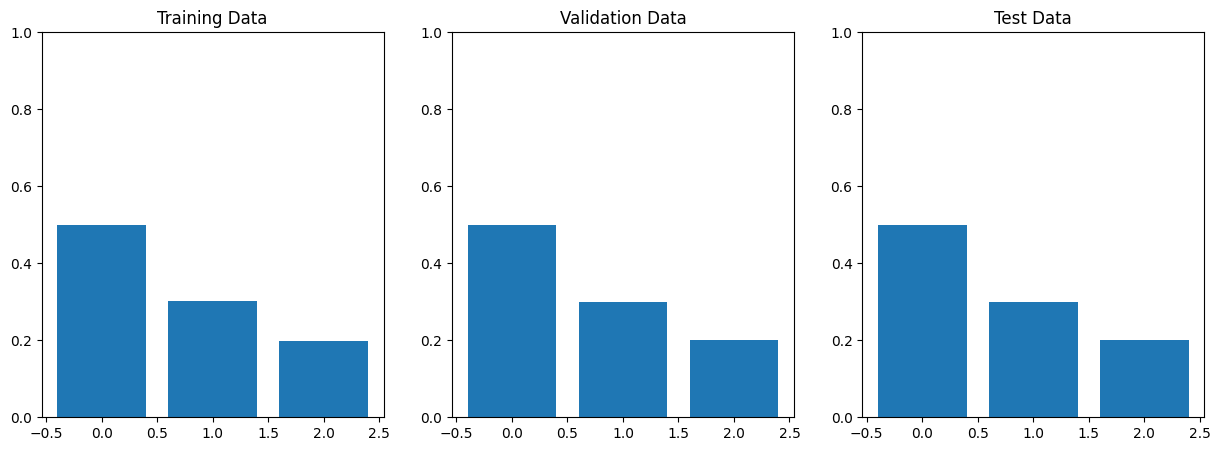

In [ ]:
train_dist = train.groupby("label").size().reset_index(name="#")
train_dist["%"] = train_dist["#"] / train_dist["#"].sum()
val_dist = val.groupby("label").size().reset_index(name="#")
val_dist["%"] = val_dist["#"] / val_dist["#"].sum()
test_dist = test.groupby("label").size().reset_index(name="#")
test_dist["%"] = test_dist["#"] / test_dist["#"].sum()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].bar(train_dist["label"], train_dist["%"])
ax[0].set_ylim(0, 1)
ax[0].set_title("Training Data")

ax[1].bar(val_dist["label"], val_dist["%"])
ax[1].set_ylim(0, 1)
ax[1].set_title("Validation Data")

ax[2].bar(test_dist["label"], test_dist["%"])
ax[2].set_ylim(0, 1)
ax[2].set_title("Test Data")

plt.savefig(f"{root}/plots/classdist.svg", format="svg")
plt.show()

The class distribution shows that all sets have approximately the same class distribution.

### Create a Dataset Object  
<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1W5MX0wX1aAg4RZiNWTnD_XKHq5k1oDAl'>
<figcaption>Fig. 4: Pytorch Dataset Class</figcaption></center>
</figure>  

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides `torch.utils.data.Dataset` that allows you to use pre-define dataset as well as your own data. Dataset stores the samples and their corresponding labels.   
  
Pytorch dataset class can be implemented in 2 ways:  
1. Map-style: Requires `__getitem__()`and `__len__()` implementation.  The map-style provides random-access capbilities. Examples: Numpy arrays, Python dicts, files on disk.  It is useful when you need to read data incrementally from disk or transform data on the fly.  Most of implementations apply the map-style  
2. Iterable-style: Requires `__iter__()` implementation.  The iterable-style can only be accessed sequentially. Examples: Python generators, streamed data from network.  
  
Fig.4 shows what dataset class required.  The implementation is shown as follows.

In [ ]:
import os
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
from torch.nn.functional import one_hot

class CustomImageDataset(Dataset):
  """
  This class is a custom dataset for pytorch

  INPUT
  annotation_file: String
    File path to data registry
  img_dir: String
    Path to image folder
  transform: Pytorch transformation object
    Input data (X) transformation pipeline
  target_transform: Pytorch transformation object
    Label (y) transformation pipeline
  """
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    """
    This method return an image (X) and its associated label (y) given an integer index

    INPUT
    idx: Integer
      Integer index

    OUTPUT
    image: Pytorch tensor
      Image (X)
    label: Integer (numpy_)
      Label (y)
    """
    img_path = self.img_labels.iloc[idx, 0]
    image = read_image(img_path, ImageReadMode.RGB)
    if self.transform:
        image = self.transform(image)

    labels = self.img_labels.iloc[:, 1].tolist()
    unique_labels = set(labels)
    if self.target_transform:
        encoded_labels = one_hot(torch.tensor(labels), num_classes=len(unique_labels))
        label = encoded_labels[idx]
    else:
        label = self.img_labels.iloc[idx, 1]
    return image, label

We will demonstrate how to use this custom dataset as follows.  Since it requires to apply transformation pipeline and some of them may involve with randomization such as randomly flipping, etc.  We need to set the random seed for torch pseudo random generator.  

Depending on which hardware you are working with.  Use `torch.cuda_manual_seed(your_seed)` when the hardware accellator is `gpu` otherwise, use `torch.manual_seed(your_seed)`.  You also need to specify deterministic backend in cuda as follows.

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

print(f"You are running on {device}.")

You are running on cuda.


In [ ]:
from torchvision import transforms

dataset = CustomImageDataset(annotations_file=f"{root}/dataset_small.csv",
                             img_dir=f"{root}/images-small",
                             transform=transforms.Compose([transforms.ToPILImage(),
                                                           transforms.RandomHorizontalFlip(),
                                                           transforms.ToTensor(),
                                                           transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                             target_transform=True)

We can get any image by passing an integer as follows.

In [ ]:
X_sample, y_sample = dataset.__getitem__(0)

Data `X` is pytorch tensor.  Label `y` is an integer.

In [ ]:
type(X_sample)

torch.Tensor

In [ ]:
X_sample.shape

torch.Size([3, 32, 32])

In [ ]:
type(y_sample)

torch.Tensor

In [ ]:
y_sample

tensor([1, 0, 0])

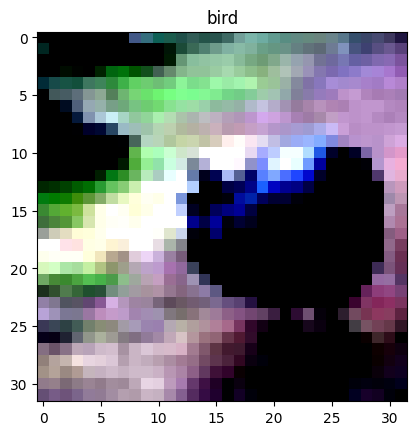

In [ ]:
plt.imshow(X_sample.permute(1, 2, 0))
plt.title(index2label[torch.argmax(y_sample).item()])
plt.show()

Now, we can create dataset object for train, val and test by using the above example.

In [ ]:
train_dataset = CustomImageDataset(annotations_file=f"{root}/train_small.csv",
                                   img_dir=f"{root}/images-small",
                                   transform=transforms.Compose([transforms.ToPILImage(),
                                                                 transforms.RandomHorizontalFlip(),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                                   target_transform=True)

val_dataset = CustomImageDataset(annotations_file=f"{root}/val_small.csv",
                                 img_dir=f"{root}/images-small",
                                 transform=transforms.Compose([transforms.ToPILImage(),
                                                               transforms.RandomHorizontalFlip(),
                                                               transforms.ToTensor(),
                                                               transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                                 target_transform=True)

test_dataset = CustomImageDataset(annotations_file=f"{root}/test_small.csv",
                                  img_dir=f"{root}/images-small",
                                  transform=transforms.Compose([transforms.ToPILImage(),
                                                                transforms.RandomHorizontalFlip(),
                                                                transforms.ToTensor(),
                                                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]),
                                  target_transform=True)

### Creating a Dataloader  
<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1WJZoqsB-JkhisVQFBhll9mS8SOAtiuSA'>
<figcaption>Fig. 5: Pytorch Dataloader Class</figcaption></center>
</figure>  

Since the Dataset retrieves our data and labels one sample at a time then pass through the predefined data transformation pipeline. While training a model, we typically want to pass samples in `minibatches`, reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval.  DataLoader is an iterable that abstracts this complexity for us in an easy API. We can simply define a dataloader and explore how it iterate over the dataset as follows.   



In [ ]:
from torch.utils.data import DataLoader

g_sample = torch.Generator()
g_sample.manual_seed(seed)

# Assume that batch size is 4
bs = 4
dataset_loader = DataLoader(dataset,
                            batch_size=bs,
                            generator=g_sample,
                            shuffle=True)

Note that you can pass `shuffle=True` for dataloader if the sampler is unused.  Let's explore the minibatch.

In [ ]:
X_batch, y_batch = next(iter(dataset_loader))

In [ ]:
y_batch

tensor([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1]])

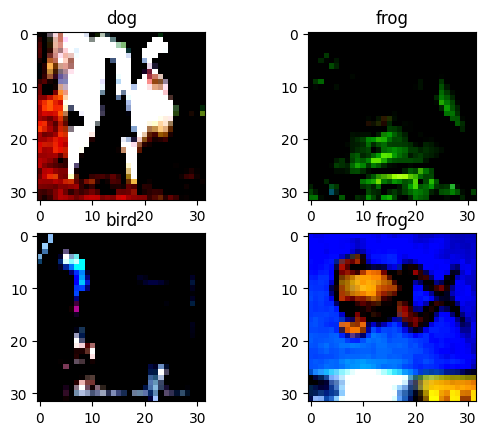

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0, 0].imshow(X_batch[0].permute(1, 2, 0))
ax[0, 0].set_title(index2label[torch.argmax(y_batch[0]).item()])

ax[0, 1].imshow(X_batch[1].permute(1, 2, 0))
ax[0, 1].set_title(index2label[torch.argmax(y_batch[1]).item()])

ax[1, 0].imshow(X_batch[2].permute(1, 2, 0))
ax[1, 0].set_title(index2label[torch.argmax(y_batch[2]).item()])

ax[1, 1].imshow(X_batch[3].permute(1, 2, 0))
ax[1, 1].set_title(index2label[torch.argmax(y_batch[3]).item()])

plt.show()

Now, we are ready to create dataloader for train, val, and test.



In [ ]:
batch_size = 16
g_train = torch.Generator()
g_train.manual_seed(seed)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          generator=g_train,
                          shuffle=True)

In [ ]:
g_val = torch.Generator()
g_val.manual_seed(seed)

val_loader = DataLoader(val_dataset,
                        batch_size=batch_size,
                        generator=g_val,
                        shuffle=False)

In [ ]:
g_test = torch.Generator()
g_test.manual_seed(seed)

test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         generator=g_test,
                         shuffle=False)

## Modeling  
<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1WXjpWJ28xxgg0hBLSbQqWtF0rqUGSvTw'>
<figcaption>Fig. 6: Model Architecture</figcaption></center>
</figure>  

From the deep leaerning experiment flow in Fig. 1.  We are moving to the next task for modeling.  This task consists of  
1) Define model architecture: Either from scratch or transfer learning  
2) Hyperparameter tuning: To find the optimum hyperparameters

We will cover the `option 1` first to give you some idea how to define architecture from scratch as follows

classtorch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
  def __init__(self, num_classes):
    super(SimpleNet, self).__init__()
    # convolutional layer (sees 32x32x3 image tensor)
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    # convolutional layer (sees 16x16x16 tensor)
    self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
    # convolutional layer (sees 8x8x32 tensor)
    self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
    # max pooling layer
    self.pool = nn.MaxPool2d(2, 2)
    # linear layer (64 * 4 * 4 -> 500)
    self.fc1 = nn.Linear(64 * 4 * 4, 500)
    # linear layer (500 -> 10)
    self.fc2 = nn.Linear(500, num_classes)
    # Define dropout layer
    self.dropout = nn.Dropout(0.25)

    """
    Note: The last non-linearity depend on the loss function you are using.
    For a classical multi-class classification use case, you could use e.g. nn.CrossEntropyLoss as your criterion. This loss function expects logits (not probabilities!)
    Therefore, we don't need to define the last activation layer
    """

  def forward(self, x):
    # add sequence of convolutional and max pooling layers
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    # flatten image input
    x = x.view(-1, 64 * 4 * 4)
    # add dropout layer
    x = self.dropout(x)
    # add 1st hidden layer, with relu activation function
    x = F.relu(self.fc1(x))
    # add dropout layer
    x = self.dropout(x)
    # add 2nd hidden layer, with relu activation function
    x = self.fc2(x)
    return x

In [ ]:
simnet = SimpleNet(num_classes=3).to(device)

Checking whether our `simplenet` can produce the correct tensor dimension or not.

In [ ]:
feature = simnet(X_batch.to(device))

In [ ]:
feature.shape

torch.Size([4, 3])

The model can be summarize as follows.

In [ ]:
from torchsummary import summary

summary(simnet, (3, 32, 32), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         MaxPool2d-2           [-1, 16, 16, 16]               0
            Conv2d-3           [-1, 32, 16, 16]           4,640
         MaxPool2d-4             [-1, 32, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
         MaxPool2d-6             [-1, 64, 4, 4]               0
           Dropout-7                 [-1, 1024]               0
            Linear-8                  [-1, 500]         512,500
           Dropout-9                  [-1, 500]               0
           Linear-10                    [-1, 3]           1,503
Total params: 537,587
Trainable params: 537,587
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.29
Params size (MB): 2.05
Estimated T

Define the loss function, hyperparameters, and training procedure per epoch is necessary.  Pytorch allow us to fully manipulate the training procedure but do it with theoretical support.  

It is possible that data could have imbalance classes that affects to model learning.  Theoretically, defining `class weight` for the loss function will help to learn from imbalance class.  The class weight can be calculated as follows from training data.  
  
Note: Althought CIFAR10 dataset has balanced class distribution, we will demonstrate how to work in the situation of imbalanced class.



In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(train["label"]),
                                                  y=train["label"])

class_weights = dict(zip(np.unique(train["label"]), class_weights))
class_weights

{0: 0.6666666666666666, 1: 1.1076923076923078, 2: 1.6744186046511629}

Pass the weight as a tensor to loss function

In [ ]:
torch.Tensor(list(class_weights.values()))

tensor([0.6667, 1.1077, 1.6744])

In [ ]:
weights = torch.Tensor(list(class_weights.values())).to(device=device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(simnet.parameters(), lr=0.001)
max_epochs = 100

### Define Training Strategy  
<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1W8-uEJr84AoUWyOF0_fhagq2Lw4ySWS4'>
<figcaption>Fig. 7: Early Stopping</figcaption></center>
</figure>  

`Early stopping` is one of the common strategy to train the model for overfit prevention. It requires the predefined parameter called `patience` that will be automatically increased by 1 when the current loss is not improved from the lowest loss.  Additional parameter may be included such as `min_delta` that represents the soft margin between current loss and the lowest loss.  

The above example shows how model was stopped training when `patient` is set to 8.  In pytorch, we can implement a class for the early stopping as follows.

In [ ]:
class EarlyStopper:
  """
  The class for early stopping
  """
  def __init__(self, patience=10, min_delta=0):
    self.patience = patience
    self.min_delta = min_delta
    self.counter = 0
    self.min_validation_loss = np.inf

  def early_stop(self, validation_loss):
    """
    This function monitors the validation loss

    INPUT:
    validation_loss: Float

    OUTPUT:
    bool (True for continue learning, False for stop learning)
    """
    if validation_loss < self.min_validation_loss:
      self.min_validation_loss = validation_loss
      self.counter = 0
    elif validation_loss > (self.min_validation_loss + self.min_delta):
      self.counter += 1
      if self.counter >= self.patience:
          return True
    return False

Next is to define `training_per_epoch` that represents the learning processes for training data and and validation processes for validation data.  The learning process requires both forward and backward propagation.  The validation process requires only forward propagation.  Implementation requires a specific module named `torchmetrics` to measure model performance in each training loop.  Details of implementation are shown as follows.

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 20.0 MB/s eta 0:00:00


We will create a custom function to make it convenient for performance metrics using pytorch.

In [ ]:
from torchmetrics import Accuracy, Precision, Recall, F1Score

def perf(ypred, ytrue, device, num_classes):
  """
  This function measures model performance

  INPUT:
  ypred: Tensor
    Mini-batch ypred

  ytrue: Tensor
    Mini-batch ytrue

  device: Tensor (dtype=str)
    Hardware accelator (cpu or cuda)

  num_classes: Integer
    Number of classes

  OUTPUT:
  p: Float
    Precision

  r: Float
    Recall

  a: Float
    Accuracy

  f: Float
    F1 score
  """
  ytrue = torch.argmax(ytrue, dim=1)
  ypred = ypred.detach().cpu()

  accuracy = Accuracy(task="multiclass", num_classes=num_classes)
  a = accuracy(ypred, ytrue)

  f1 = F1Score(task="multiclass", num_classes=num_classes)
  f = f1(ypred, ytrue)

  precision = Precision(average="macro", task="multiclass", num_classes=num_classes)
  p = precision(ypred, ytrue)

  recall = Recall(average="macro", task="multiclass", num_classes=num_classes)
  r = recall(ypred, ytrue)

  return p, r, a, f

Then use the above function `perf` in the `minibatch_training` as follows.

In [ ]:
from tqdm.notebook import tqdm

def minibatch_training(dataloader, optimizer, criterion, model, device, num_classes):
  """
  This function performs a minibatch training

  INPUT:
  dataloader: Torch data loader
    Train data loader

  optimizer: Torch optim
    Gradient optimizer

  criterion: Torch nn Loss function
    Loss function

  model: Torch model object
    The model

  device: Tensor (dtype=str)
    Hardware accelator (cpu or cuda)

  num_classes: Integer
    Number of classes

  OUTPUT:
  loss: Float
    Loss in one epoch

  precision: Float
    Average Precision per epoch

  recall: Float
    Average Recall per epoch

  accuracy: Float
    Average Accuracy per epoch

  f1: Float
    Average F1 score per epoch
  """
  loss = 0
  precision = []
  recall = []
  accuracy = []
  f1 = []
  for minibatch in tqdm(dataloader, desc="Mini-Batch Training Progress"):
    X_minibatch, y_minibatch = minibatch

    # Set zero gradients for every minibatch
    optimizer.zero_grad()

    # Forward propagation
    ypred_minibatch = model(X_minibatch.to(device=device))

    # Compute Loss
    minibatch_loss = criterion(ypred_minibatch, y_minibatch.to(device=device, dtype=torch.float))

    # Backward propagation
    minibatch_loss.backward()

    # Update weights
    optimizer.step()

    # Update loss
    loss += minibatch_loss.item()

    # Measure Performance
    p, r, a, f = perf(ypred_minibatch, y_minibatch, device, num_classes=num_classes)

    precision.append(p)
    recall.append(r)
    accuracy.append(a)
    f1.append(f)

  return loss, np.mean(precision), np.mean(recall), np.mean(accuracy), np.mean(f1)

Then we define a custom function for validation each minibatch as follows.

In [ ]:
def minibatch_validation(dataloader, criterion, model, device, num_classes):
  """
  This function performs a minibatch training

  INPUT:
  dataloader: Torch data loader
    Train data loader

  criterion: Torch nn Loss function
    Loss function

  model: Torch model object
    The model

  device: Tensor (dtype=str)
    Hardware accelator (cpu or cuda)

  num_classes: Integer
    Number of classes

  OUTPUT:
  loss: Float
    Loss in one epoch

  precision: Float
    Average Precision per epoch

  recall: Float
    Average Recall per epoch

  accuracy: Float
    Average Accuracy per epoch

  f1: Float
    Average F1 score per epoch
  """
  loss = 0
  precision = []
  recall = []
  accuracy = []
  f1 = []
  model.eval() # Switch off dropout and batch normalization layer
  with torch.no_grad(): # Turn-off gradient computation
    for minibatch in tqdm(dataloader, desc="Mini-Batch Validation Progress"):
      X_minibatch, y_minibatch = minibatch

      # Forward propagation
      ypred_minibatch = model(X_minibatch.to(device=device))

      # Compute Loss
      minibatch_loss = criterion(ypred_minibatch, y_minibatch.to(device=device, dtype=torch.float))

      # Update loss
      loss += minibatch_loss.item()

      # Measure Performance
      p, r, a, f = perf(ypred_minibatch, y_minibatch, device, num_classes=num_classes)

      precision.append(p)
      recall.append(r)
      accuracy.append(a)
      f1.append(f)

  return loss, np.mean(precision), np.mean(recall), np.mean(accuracy), np.mean(f1)

Next, we create a custom function for model training until it is converged as follows.

In [ ]:
!pip install colorama

In [ ]:
from colorama import Fore, Style

def fit(model, train_loader, val_loader, max_epochs, optimizer, criterion, model_file, display, num_classes):
  """
  This function performs model training

  INPUT:
  model: Torch model object
    The model

  train_loader: Torch DataLoader
    Train dataloader

  val_loader: Torch DataLoader
    Val dataloader

  max_epochs: Integer
    Maximum training epoch

  optimizer: Torch optim
    Gradient optimizer

  criterion: Torch nn Loss function
    Loss function

  model_file: String
    Model filename

  display: Boolean
    True for plotting training curve, False otherwise

  num_classes: Integer
    Number of Classes

  OUTPUT:
  This function does not return output

  """
  train_losses = []
  train_precision = []
  train_recall = []
  train_accuracy = []
  train_f1 = []

  val_losses = []
  val_precision = []
  val_recall = []
  val_accuracy = []
  val_f1 = []

  es = EarlyStopper(patience=20)
  min_val_loss = np.inf

  log = pd.DataFrame()

  for epoch in tqdm(range(max_epochs), desc="Training Progress"):
    print("===========")
    print(f"Epoch {epoch}")

    train_loss, train_p, train_r, train_a, train_f = minibatch_training(train_loader, optimizer, criterion, model, device, num_classes=num_classes)
    train_losses.append(train_loss)
    train_precision.append(train_p.item())
    train_recall.append(train_r.item())
    train_accuracy.append(train_a.item())
    train_f1.append(train_f.item())

    val_loss, val_p, val_r, val_a, val_f = minibatch_validation(val_loader, criterion, model, device, num_classes=num_classes)
    val_losses.append(val_loss)
    val_precision.append(val_p.item())
    val_recall.append(val_r.item())
    val_accuracy.append(val_a.item())
    val_f1.append(val_f.item())

    print(f"Epoch {epoch}: Training loss is {Fore.MAGENTA}{round(train_loss, 3)}{Style.RESET_ALL}.  Val loss is {Fore.YELLOW}{round(val_loss, 3)}{Style.RESET_ALL}.")
    print(f"  - Precision (Training): {Fore.MAGENTA}{round(train_p.item(), 3)}{Style.RESET_ALL}, Precision (Validation): {Fore.YELLOW}{round(val_p.item(), 3)}{Style.RESET_ALL}")
    print(f"  - Recall (Training): {Fore.MAGENTA}{round(train_r.item(), 3)}{Style.RESET_ALL}, Recall (Validation): {Fore.YELLOW}{round(val_r.item(), 3)}{Style.RESET_ALL}")
    print(f"  - Accuracy (Training): {Fore.MAGENTA}{round(train_a.item(), 3)}{Style.RESET_ALL}, Accuracy (Validation): {Fore.YELLOW}{round(val_a.item(), 3)}{Style.RESET_ALL}")
    print(f"  - F1 (Training): {Fore.MAGENTA}{round(train_f.item(), 3)}{Style.RESET_ALL}, F1 (Validation): {Fore.YELLOW}{round(val_f.item(), 3)}{Style.RESET_ALL}")

    if val_loss < min_val_loss:
      print(f"   {Fore.LIGHTGREEN_EX}Validation loss has improved{Style.RESET_ALL} from {Fore.CYAN}{round(min_val_loss, 3)}{Style.RESET_ALL} to {Fore.CYAN}{round(val_loss, 3)}{Style.RESET_ALL}.  Saving the model to '{root}/models/{model_file}.pt'")
      torch.save({"epoch": epoch,
                  "model_state_dict": model.state_dict(),
                  "optimizer_state_dict": optimizer.state_dict(),
                  "val_loss": val_loss,
                  "training_loss": train_loss},
                f"{root}/models/{model_file}.pt".format(model_file))
      min_val_loss = val_loss
    else:
      pass

    if es.early_stop(val_loss):
      print(f"Early stopping at {epoch} epoch at val loss {round(val_loss, 3)}")
      break
    else:
      pass

  log["training_loss"] = [np.inf] + train_losses
  log["val_loss"] = [np.inf] + val_losses
  log["training_precision"] = [0] + train_precision
  log["training_recall"] = [0] + train_recall
  log["training_accuracy"] = [0] + train_accuracy
  log["training_f1"] = [0] + train_f1
  log["val_precision"] = [0] + val_precision
  log["val_recall"] = [0] + val_recall
  log["val_accuracy"] = [0] + val_accuracy
  log["val_f1"] = [0] + val_f1
  log.reset_index(inplace=True)
  log.rename(columns={"index": "epochs"}, inplace=True)
  log.to_csv(f"{root}/log/{model_file}.csv")

  if display:
    plt.figure(figsize=(10, 5))
    plt.plot(log["epochs"], log["training_loss"], color="blue", label="Training Loss")
    plt.plot(log["epochs"], log["val_loss"], color="red", label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="best")
    plt.savefig(f"{root}/plots/loss_{model_file}.svg", format="svg")
    plt.show()
  else:
    pass

Training Progress:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 0


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 0: Training loss is 29.672.  Val loss is 9.647.
  - Precision (Training): 0.351, Precision (Validation): 0.364
  - Recall (Training): 0.413, Recall (Validation): 0.336
  - Accuracy (Training): 0.405, Accuracy (Validation): 0.271
  - F1 (Training): 0.405, F1 (Validation): 0.271
   Validation loss has improved from inf to 9.647.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/simnet.pt'
Epoch 1


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1: Training loss is 28.001.  Val loss is 8.232.
  - Precision (Training): 0.552, Precision (Validation): 0.584
  - Recall (Training): 0.522, Recall (Validation): 0.526
  - Accuracy (Training): 0.507, Accuracy (Validation): 0.486
  - F1 (Training): 0.507, F1 (Validation): 0.486
   Validation loss has improved from 9.647 to 8.232.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/simnet.pt'
Epoch 2


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2: Training loss is 26.552.  Val loss is 8.223.
  - Precision (Training): 0.471, Precision (Validation): 0.68
  - Recall (Training): 0.515, Recall (Validation): 0.55
  - Accuracy (Training): 0.488, Accuracy (Validation): 0.611
  - F1 (Training): 0.488, F1 (Validation): 0.611
   Validation loss has improved from 8.232 to 8.223.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/simnet.pt'
Epoch 3


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3: Training loss is 23.353.  Val loss is 7.659.
  - Precision (Training): 0.611, Precision (Validation): 0.673
  - Recall (Training): 0.598, Recall (Validation): 0.604
  - Accuracy (Training): 0.595, Accuracy (Validation): 0.611
  - F1 (Training): 0.595, F1 (Validation): 0.611
   Validation loss has improved from 8.223 to 7.659.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/simnet.pt'
Epoch 4


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4: Training loss is 22.875.  Val loss is 7.22.
  - Precision (Training): 0.605, Precision (Validation): 0.591
  - Recall (Training): 0.615, Recall (Validation): 0.565
  - Accuracy (Training): 0.576, Accuracy (Validation): 0.667
  - F1 (Training): 0.576, F1 (Validation): 0.667
   Validation loss has improved from 7.659 to 7.22.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/simnet.pt'
Epoch 5


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5: Training loss is 19.204.  Val loss is 6.145.
  - Precision (Training): 0.725, Precision (Validation): 0.651
  - Recall (Training): 0.714, Recall (Validation): 0.641
  - Accuracy (Training): 0.699, Accuracy (Validation): 0.701
  - F1 (Training): 0.699, F1 (Validation): 0.701
   Validation loss has improved from 7.22 to 6.145.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/simnet.pt'
Epoch 6


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 6: Training loss is 16.852.  Val loss is 6.627.
  - Precision (Training): 0.727, Precision (Validation): 0.624
  - Recall (Training): 0.747, Recall (Validation): 0.619
  - Accuracy (Training): 0.736, Accuracy (Validation): 0.674
  - F1 (Training): 0.736, F1 (Validation): 0.674
Epoch 7


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 7: Training loss is 15.963.  Val loss is 6.776.
  - Precision (Training): 0.743, Precision (Validation): 0.659
  - Recall (Training): 0.745, Recall (Validation): 0.645
  - Accuracy (Training): 0.762, Accuracy (Validation): 0.653
  - F1 (Training): 0.762, F1 (Validation): 0.653
Epoch 8


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 8: Training loss is 15.936.  Val loss is 6.834.
  - Precision (Training): 0.762, Precision (Validation): 0.701
  - Recall (Training): 0.773, Recall (Validation): 0.643
  - Accuracy (Training): 0.734, Accuracy (Validation): 0.729
  - F1 (Training): 0.734, F1 (Validation): 0.729
Epoch 9


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 9: Training loss is 12.347.  Val loss is 7.19.
  - Precision (Training): 0.798, Precision (Validation): 0.776
  - Recall (Training): 0.813, Recall (Validation): 0.709
  - Accuracy (Training): 0.789, Accuracy (Validation): 0.757
  - F1 (Training): 0.789, F1 (Validation): 0.757
Epoch 10


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 10: Training loss is 11.203.  Val loss is 9.555.
  - Precision (Training): 0.784, Precision (Validation): 0.555
  - Recall (Training): 0.794, Recall (Validation): 0.587
  - Accuracy (Training): 0.812, Accuracy (Validation): 0.674
  - F1 (Training): 0.812, F1 (Validation): 0.674
Epoch 11


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 11: Training loss is 9.57.  Val loss is 6.615.
  - Precision (Training): 0.847, Precision (Validation): 0.685
  - Recall (Training): 0.864, Recall (Validation): 0.682
  - Accuracy (Training): 0.85, Accuracy (Validation): 0.715
  - F1 (Training): 0.85, F1 (Validation): 0.715
Epoch 12


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 12: Training loss is 8.316.  Val loss is 7.233.
  - Precision (Training): 0.9, Precision (Validation): 0.648
  - Recall (Training): 0.904, Recall (Validation): 0.626
  - Accuracy (Training): 0.898, Accuracy (Validation): 0.715
  - F1 (Training): 0.898, F1 (Validation): 0.715
Epoch 13


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 13: Training loss is 5.249.  Val loss is 10.018.
  - Precision (Training): 0.917, Precision (Validation): 0.703
  - Recall (Training): 0.929, Recall (Validation): 0.635
  - Accuracy (Training): 0.924, Accuracy (Validation): 0.722
  - F1 (Training): 0.924, F1 (Validation): 0.722
Epoch 14


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 14: Training loss is 5.687.  Val loss is 7.575.
  - Precision (Training): 0.896, Precision (Validation): 0.661
  - Recall (Training): 0.907, Recall (Validation): 0.682
  - Accuracy (Training): 0.924, Accuracy (Validation): 0.708
  - F1 (Training): 0.924, F1 (Validation): 0.708
Epoch 15


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 15: Training loss is 4.906.  Val loss is 9.586.
  - Precision (Training): 0.923, Precision (Validation): 0.682
  - Recall (Training): 0.944, Recall (Validation): 0.653
  - Accuracy (Training): 0.928, Accuracy (Validation): 0.736
  - F1 (Training): 0.928, F1 (Validation): 0.736
Epoch 16


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 16: Training loss is 3.641.  Val loss is 8.192.
  - Precision (Training): 0.948, Precision (Validation): 0.673
  - Recall (Training): 0.962, Recall (Validation): 0.653
  - Accuracy (Training): 0.949, Accuracy (Validation): 0.743
  - F1 (Training): 0.949, F1 (Validation): 0.743
Epoch 17


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 17: Training loss is 3.116.  Val loss is 9.239.
  - Precision (Training): 0.938, Precision (Validation): 0.658
  - Recall (Training): 0.959, Recall (Validation): 0.643
  - Accuracy (Training): 0.958, Accuracy (Validation): 0.694
  - F1 (Training): 0.958, F1 (Validation): 0.694
Epoch 18


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 18: Training loss is 2.271.  Val loss is 9.61.
  - Precision (Training): 0.961, Precision (Validation): 0.626
  - Recall (Training): 0.967, Recall (Validation): 0.626
  - Accuracy (Training): 0.965, Accuracy (Validation): 0.701
  - F1 (Training): 0.965, F1 (Validation): 0.701
Epoch 19


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 19: Training loss is 1.837.  Val loss is 9.418.
  - Precision (Training): 0.986, Precision (Validation): 0.657
  - Recall (Training): 0.987, Recall (Validation): 0.649
  - Accuracy (Training): 0.986, Accuracy (Validation): 0.722
  - F1 (Training): 0.986, F1 (Validation): 0.722
Epoch 20


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 20: Training loss is 1.14.  Val loss is 12.319.
  - Precision (Training): 0.989, Precision (Validation): 0.707
  - Recall (Training): 0.992, Recall (Validation): 0.66
  - Accuracy (Training): 0.988, Accuracy (Validation): 0.743
  - F1 (Training): 0.988, F1 (Validation): 0.743
Epoch 21


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 21: Training loss is 1.398.  Val loss is 11.316.
  - Precision (Training): 0.985, Precision (Validation): 0.671
  - Recall (Training): 0.991, Recall (Validation): 0.634
  - Accuracy (Training): 0.988, Accuracy (Validation): 0.715
  - F1 (Training): 0.988, F1 (Validation): 0.715
Epoch 22


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 22: Training loss is 1.24.  Val loss is 13.638.
  - Precision (Training): 0.976, Precision (Validation): 0.645
  - Recall (Training): 0.983, Recall (Validation): 0.633
  - Accuracy (Training): 0.979, Accuracy (Validation): 0.701
  - F1 (Training): 0.979, F1 (Validation): 0.701
Epoch 23


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 23: Training loss is 2.848.  Val loss is 11.695.
  - Precision (Training): 0.94, Precision (Validation): 0.622
  - Recall (Training): 0.952, Recall (Validation): 0.612
  - Accuracy (Training): 0.951, Accuracy (Validation): 0.694
  - F1 (Training): 0.951, F1 (Validation): 0.694
Epoch 24


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 24: Training loss is 1.476.  Val loss is 11.416.
  - Precision (Training): 0.975, Precision (Validation): 0.687
  - Recall (Training): 0.984, Recall (Validation): 0.7
  - Accuracy (Training): 0.979, Accuracy (Validation): 0.764
  - F1 (Training): 0.979, F1 (Validation): 0.764
Epoch 25


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 25: Training loss is 1.247.  Val loss is 12.593.
  - Precision (Training): 0.976, Precision (Validation): 0.617
  - Recall (Training): 0.98, Recall (Validation): 0.615
  - Accuracy (Training): 0.977, Accuracy (Validation): 0.688
  - F1 (Training): 0.977, F1 (Validation): 0.688
Early stopping at 25 epoch at val loss 12.593


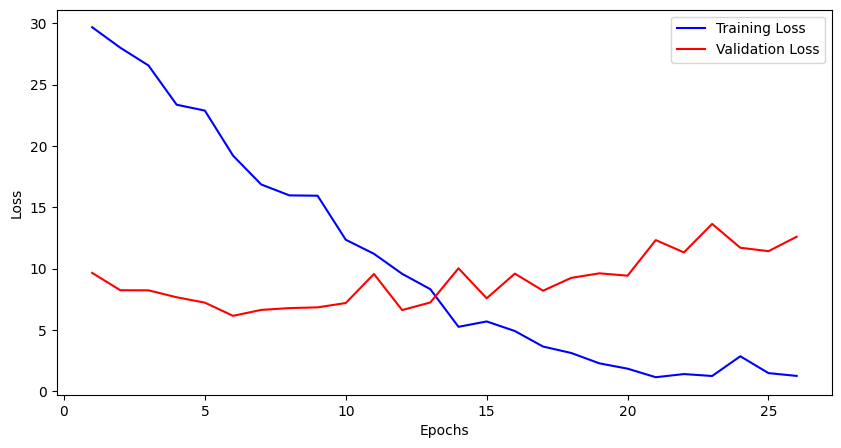

In [ ]:
fit(simnet,
    train_loader,
    val_loader,
    max_epochs=300,
    optimizer=optimizer,
    criterion=criterion,
    model_file="simnet",
    display=True,
    num_classes=3)

As you can see that building model from scratch could face the underfit problem because of several reasons, e.g. The model complexity is not high enough to perform a given task, The number of samples is too small to learn, etc.  To overcome this problem, we can do transfer learning that leverages model parameters learned from another dataset then generalize to our task.  The whole idea is to use pretrain model as a feature extractor and fine tune it to our data.

We will demonstrate with a simple pretrained model `VGG16` as follows.

In [ ]:
from torchvision.models import vgg16
import torchvision

pretrain = vgg16(weights=torchvision.models.VGG16_Weights.DEFAULT)

# Apply early freeze (In this tutorial, we will freeze all pretrain weight because we will leverage its knowledge obtained from IMAGENET dataset)
for param in pretrain.parameters():
  param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 82.6MB/s]


The easiest transfer learning is to change the last output layer (classification layer) to have the same number of classes in your data.  You can also add more top-up layers by using `nn.Sequential()` then add a sequence of dense layers based on your design.  

In [ ]:
class XferNet(nn.Module):
  def __init__(self, pretrain, num_classes):
    super().__init__()
    self.pretrain = pretrain
    self.fc1 = nn.Linear(1000, 512)
    self.act1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.bn1 = nn.BatchNorm1d(512)
    self.fc2 = nn.Linear(512, 256)
    self.act2 = nn.ReLU()
    self.dropout2 = nn.Dropout(0.4)
    self.bn2 = nn.BatchNorm1d(256)
    self.fc3 = nn.Linear(256, num_classes)

  def forward(self, x):
    x = self.pretrain(x)
    x = self.fc1(x)
    x = self.act1(x)
    x = self.dropout1(x)
    x = self.bn1(x)
    x = self.act2(self.fc2(x))
    x = self.dropout2(x)
    x = self.bn2(x)
    x = self.fc3(x)
    return x

In [ ]:
xfernet = XferNet(pretrain, num_classes=3).to(device)

Explore model summary

In [ ]:
summary(xfernet, (3, 32, 32), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

Let's test with some minibatch

In [ ]:
X_batch.to(device).type()

'torch.cuda.FloatTensor'

In [ ]:
xfer_feature = xfernet(X_batch.to(device))

Now we train this model with our dataset again

In [ ]:
xfer_criterion = nn.CrossEntropyLoss(weight=weights)
xfer_optimizer = torch.optim.Adam(xfernet.parameters(), lr=0.001)

Training Progress:   0%|          | 0/300 [00:00<?, ?it/s]

Epoch 0


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 0: Training loss is 21.827.  Val loss is 6.186.
  - Precision (Training): 0.626, Precision (Validation): 0.662
  - Recall (Training): 0.67, Recall (Validation): 0.653
  - Accuracy (Training): 0.634, Accuracy (Validation): 0.694
  - F1 (Training): 0.634, F1 (Validation): 0.694
   Validation loss has improved from inf to 6.186.  Saving the model to '/content/drive/MyDrive/Talk Events/AIT/2023/pytorch-image/models/vggnet.pt'
Epoch 1


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1: Training loss is 15.047.  Val loss is 6.364.
  - Precision (Training): 0.724, Precision (Validation): 0.648
  - Recall (Training): 0.754, Recall (Validation): 0.693
  - Accuracy (Training): 0.757, Accuracy (Validation): 0.701
  - F1 (Training): 0.757, F1 (Validation): 0.701
Epoch 2


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2: Training loss is 12.099.  Val loss is 6.254.
  - Precision (Training): 0.773, Precision (Validation): 0.691
  - Recall (Training): 0.802, Recall (Validation): 0.67
  - Accuracy (Training): 0.799, Accuracy (Validation): 0.736
  - F1 (Training): 0.799, F1 (Validation): 0.736
Epoch 3


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3: Training loss is 10.414.  Val loss is 6.56.
  - Precision (Training): 0.824, Precision (Validation): 0.635
  - Recall (Training): 0.854, Recall (Validation): 0.66
  - Accuracy (Training): 0.85, Accuracy (Validation): 0.701
  - F1 (Training): 0.85, F1 (Validation): 0.701
Epoch 4


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4: Training loss is 7.773.  Val loss is 7.606.
  - Precision (Training): 0.869, Precision (Validation): 0.648
  - Recall (Training): 0.888, Recall (Validation): 0.64
  - Accuracy (Training): 0.887, Accuracy (Validation): 0.722
  - F1 (Training): 0.887, F1 (Validation): 0.722
Epoch 5


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5: Training loss is 7.04.  Val loss is 8.837.
  - Precision (Training): 0.872, Precision (Validation): 0.616
  - Recall (Training): 0.898, Recall (Validation): 0.637
  - Accuracy (Training): 0.898, Accuracy (Validation): 0.701
  - F1 (Training): 0.898, F1 (Validation): 0.701
Epoch 6


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 6: Training loss is 6.478.  Val loss is 9.563.
  - Precision (Training): 0.885, Precision (Validation): 0.656
  - Recall (Training): 0.902, Recall (Validation): 0.657
  - Accuracy (Training): 0.896, Accuracy (Validation): 0.708
  - F1 (Training): 0.896, F1 (Validation): 0.708
Epoch 7


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 7: Training loss is 5.22.  Val loss is 8.996.
  - Precision (Training): 0.909, Precision (Validation): 0.672
  - Recall (Training): 0.918, Recall (Validation): 0.674
  - Accuracy (Training): 0.917, Accuracy (Validation): 0.729
  - F1 (Training): 0.917, F1 (Validation): 0.729
Epoch 8


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 8: Training loss is 3.952.  Val loss is 8.292.
  - Precision (Training): 0.935, Precision (Validation): 0.693
  - Recall (Training): 0.95, Recall (Validation): 0.73
  - Accuracy (Training): 0.935, Accuracy (Validation): 0.757
  - F1 (Training): 0.935, F1 (Validation): 0.757
Epoch 9


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 9: Training loss is 2.797.  Val loss is 10.133.
  - Precision (Training): 0.964, Precision (Validation): 0.69
  - Recall (Training): 0.964, Recall (Validation): 0.686
  - Accuracy (Training): 0.965, Accuracy (Validation): 0.743
  - F1 (Training): 0.965, F1 (Validation): 0.743
Epoch 10


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 10: Training loss is 1.876.  Val loss is 12.039.
  - Precision (Training): 0.964, Precision (Validation): 0.709
  - Recall (Training): 0.974, Recall (Validation): 0.71
  - Accuracy (Training): 0.968, Accuracy (Validation): 0.757
  - F1 (Training): 0.968, F1 (Validation): 0.757
Epoch 11


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 11: Training loss is 3.55.  Val loss is 11.253.
  - Precision (Training): 0.937, Precision (Validation): 0.633
  - Recall (Training): 0.963, Recall (Validation): 0.648
  - Accuracy (Training): 0.951, Accuracy (Validation): 0.708
  - F1 (Training): 0.951, F1 (Validation): 0.708
Epoch 12


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 12: Training loss is 1.69.  Val loss is 12.213.
  - Precision (Training): 0.974, Precision (Validation): 0.657
  - Recall (Training): 0.979, Recall (Validation): 0.671
  - Accuracy (Training): 0.979, Accuracy (Validation): 0.708
  - F1 (Training): 0.979, F1 (Validation): 0.708
Epoch 13


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 13: Training loss is 1.962.  Val loss is 12.176.
  - Precision (Training): 0.978, Precision (Validation): 0.685
  - Recall (Training): 0.979, Recall (Validation): 0.689
  - Accuracy (Training): 0.972, Accuracy (Validation): 0.757
  - F1 (Training): 0.972, F1 (Validation): 0.757
Epoch 14


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 14: Training loss is 1.183.  Val loss is 17.418.
  - Precision (Training): 0.983, Precision (Validation): 0.593
  - Recall (Training): 0.988, Recall (Validation): 0.58
  - Accuracy (Training): 0.984, Accuracy (Validation): 0.688
  - F1 (Training): 0.984, F1 (Validation): 0.688
Epoch 15


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 15: Training loss is 1.873.  Val loss is 14.427.
  - Precision (Training): 0.982, Precision (Validation): 0.617
  - Recall (Training): 0.981, Recall (Validation): 0.606
  - Accuracy (Training): 0.981, Accuracy (Validation): 0.701
  - F1 (Training): 0.981, F1 (Validation): 0.701
Epoch 16


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 16: Training loss is 5.43.  Val loss is 23.004.
  - Precision (Training): 0.953, Precision (Validation): 0.634
  - Recall (Training): 0.955, Recall (Validation): 0.63
  - Accuracy (Training): 0.951, Accuracy (Validation): 0.722
  - F1 (Training): 0.951, F1 (Validation): 0.722
Epoch 17


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 17: Training loss is 13.094.  Val loss is 15.318.
  - Precision (Training): 0.866, Precision (Validation): 0.655
  - Recall (Training): 0.878, Recall (Validation): 0.635
  - Accuracy (Training): 0.882, Accuracy (Validation): 0.681
  - F1 (Training): 0.882, F1 (Validation): 0.681
Epoch 18


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 18: Training loss is 5.87.  Val loss is 12.144.
  - Precision (Training): 0.902, Precision (Validation): 0.673
  - Recall (Training): 0.92, Recall (Validation): 0.685
  - Accuracy (Training): 0.924, Accuracy (Validation): 0.722
  - F1 (Training): 0.924, F1 (Validation): 0.722
Epoch 19


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 19: Training loss is 5.206.  Val loss is 13.755.
  - Precision (Training): 0.893, Precision (Validation): 0.66
  - Recall (Training): 0.922, Recall (Validation): 0.689
  - Accuracy (Training): 0.917, Accuracy (Validation): 0.729
  - F1 (Training): 0.917, F1 (Validation): 0.729
Epoch 20


Mini-Batch Training Progress:   0%|          | 0/27 [00:00<?, ?it/s]

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 20: Training loss is 3.81.  Val loss is 14.393.
  - Precision (Training): 0.955, Precision (Validation): 0.621
  - Recall (Training): 0.968, Recall (Validation): 0.62
  - Accuracy (Training): 0.963, Accuracy (Validation): 0.688
  - F1 (Training): 0.963, F1 (Validation): 0.688
Early stopping at 20 epoch at val loss 14.393


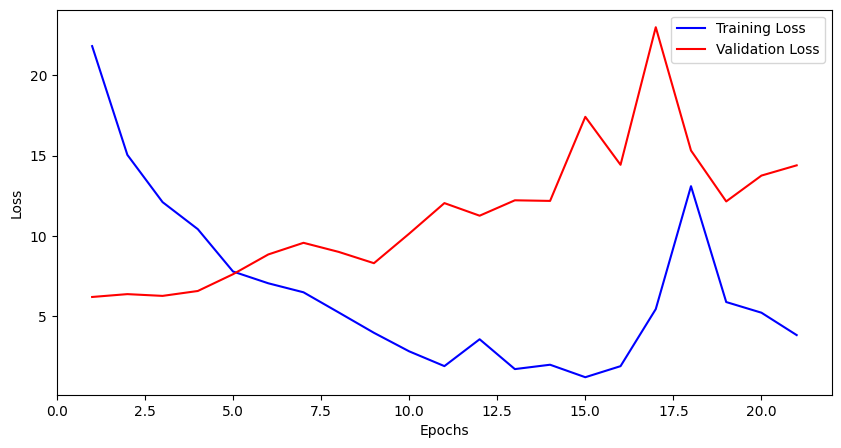

In [ ]:
fit(xfernet,
    train_loader,
    val_loader,
    max_epochs=300,
    optimizer=xfer_optimizer,
    criterion=xfer_criterion,
    model_file="vggnet",
    display=True,
    num_classes=3)

Let's do model evaluation.  We will measure `precision`, `recall`, `f1`, and `accuracy`.  We can also reuse our previous predefined function `minibatch_validation`.

In [ ]:
_, p_simnet, r_simnet, a_simnet, f_simnet = minibatch_validation(test_loader, criterion, simnet, device, num_classes=3)

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
_, p_xfernet, r_xfernet, a_xfernet, f_xfernet = minibatch_validation(test_loader, xfer_criterion, xfernet, device, num_classes=3)

Mini-Batch Validation Progress:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
print("----------- Benchmarking -----------")
print("Precision")
print(f"   SimNet: {round(p_simnet.item(), 3)}, XferNet: {round(p_xfernet.item(), 3)}")
print("Recall")
print(f"   SimNet: {round(r_simnet.item(), 3)}, XferNet: {round(r_xfernet.item(), 3)}")
print("Accuracy")
print(f"   SimNet: {round(f_simnet.item(), 3)}, XferNet: {round(f_xfernet.item(), 3)}")
print("F1")
print(f"   SimNet: {round(f_simnet.item(), 3)}, XferNet: {round(f_xfernet.item(), 3)}")


----------- Benchmarking -----------
Precision
   SimNet: 0.744, XferNet: 0.766
Recall
   SimNet: 0.701, XferNet: 0.752
Accuracy
   SimNet: 0.743, XferNet: 0.757
F1
   SimNet: 0.743, XferNet: 0.757


You can see that with the right transfer learning, we can get the better model.  You can also improve model by using hyperparameter tuning.  
Congratulation!   You have finished CNN in pytorch.